## Data Analysis and Missing Imputation

In [18]:
# Neccessary imports
import pandas as pd
import numpy as np

In [19]:
# Reading the data
data=pd.read_csv(r"C:\Users\harsh\Data.csv",encoding='latin1')

C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### # Early Data Exploration

In [7]:
data.head()

,loan_amnt,terms,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,...,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0
1,4800,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0
2,10000,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0
3,15000,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0
4,16000,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0


In [9]:
data.columns

Index(['ï»¿member_id ', 'loan_amnt ', 'terms', 'batch_ID ', 'Rate_of_intrst',
       'grade', 'sub_grade', 'Emp_designation', 'Experience', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'State',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       'pub_rec', 'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ï»¿member_id                 887379 non-null  int64  
 1   loan_amnt                    887379 non-null  int64  
 2   terms                        887379 non-null  object 
 3   batch_ID                     756631 non-null  object 
 4   Rate_of_intrst               887379 non-null  float64
 5   grade                        887379 non-null  object 
 6   sub_grade                    887379 non-null  object 
 7   Emp_designation              835917 non-null  object 
 8   Experience                   842554 non-null  object 
 9   home_ownership               887379 non-null  object 
 10  annual_inc                   887375 non-null  float64
 11  verification_status          887379 non-null  object 
 12  purpose                      887379 non-null  object 
 13 

### Drop unnecessary columns and reduce dimension

In [20]:
# dropping the unnecessary columns
data = data.drop(data.columns[[0,3]], axis=1)

### Filtering out Numeric and Categoric variables
  - Understand the relationship between specific variables.
  - Percentage of Missing values within each variable.

In [14]:
# display Categoric variables
categorical = [col for col in data.columns if data[col].dtypes == 'O']

categorical

['terms',
 'batch_ID ',
 'grade',
 'sub_grade',
 'Emp_designation',
 'Experience',
 'home_ownership',
 'verification_status',
 'purpose',
 'State',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'last_week_pay']

In [21]:
# display numerical variables

numerical = [col for col in data.columns if data[col].dtypes != 'O']

numerical=data[numerical]

In [23]:
print(numerical.min()) 

loan_amnt                      500.00
Rate_of_intrst                   5.32
annual_inc                       0.00
debt_income_ratio                0.00
delinq_2yrs                      0.00
inq_last_6mths                   0.00
mths_since_last_delinq           0.00
mths_since_last_record           0.00
numb_credit                      0.00
pub_rec                          0.00
total revol_bal                  0.00
total_credits                    1.00
total_rec_int                    0.00
total_rec_late_fee               0.00
recoveries                       0.00
collection_recovery_fee          0.00
collections_12_mths_ex_med       0.00
mths_since_last_major_derog      0.00
acc_now_delinq                   0.00
tot_colle_amt                    0.00
tot_curr_bal                     0.00
dtype: float64


In [14]:
numerical.describe()

,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.082900e+04,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,86.000000,2.904836e+06,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [16]:
for i in categorical:
  print(data[i].value_counts())

36 months    621125
60 months    266254
Name: terms, dtype: int64
              234087
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT2331079        13
BAT6671483        10
BAT3411179         9
BAT3966851         8
BAT6027836         7
Name: batch_ID , Length: 207, dtype: int64
B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64
B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64
Teacher                                 13807
Manager                                 11638
Register

In [17]:
# checking for missing values in numerical columns
df=data[numerical].isna().mean()
df.sort_values(ascending=False)

mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
mths_since_last_delinq         0.511971
tot_curr_bal                   0.079195
tot_colle_amt                  0.079195
collections_12_mths_ex_med     0.000163
delinq_2yrs                    0.000033
inq_last_6mths                 0.000033
numb_credit                    0.000033
pub_rec                        0.000033
total_credits                  0.000033
acc_now_delinq                 0.000033
annual_inc                     0.000005
total revol_bal                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
debt_income_ratio              0.000000
Rate_of_intrst                 0.000000
loan_amnt                      0.000000
ï»¿member_id                   0.000000
dtype: float64

### A note on Missing values:
    - The variable having missing values may be valued depending on the dataset and the problem definition. Consider an example, where the dataset contains a column for date of marriage. It may be blank for 50% (or even more) of the population, but might have very high information about the lifestyle of the person. In such cases, you would still use the variable.

    - If the value of information in the variable is not that high, ideally we drop the variable if it has more than 50% missing values. There are projects / models where imputation of even 20 - 30% missing values provide better results - the famous Titanic dataset on Kaggle being one such case. Age is missing in ~20% of cases, but you benefit by imputing them rather than ignoring the variable.

In [18]:
# checking for missing values in categorical columns
dc=data[categorical].isna().mean()
dc.sort_values(ascending=False)

verification_status_joint    0.999424
batch_ID                     0.147342
Emp_designation              0.057993
Experience                   0.050514
last_week_pay                0.000000
application_type             0.000000
initial_list_status          0.000000
State                        0.000000
purpose                      0.000000
verification_status          0.000000
home_ownership               0.000000
sub_grade                    0.000000
grade                        0.000000
terms                        0.000000
dtype: float64

In [19]:
# Missing values to be imputed
miss=['Emp_designation','Experience','mths_since_last_delinq']

### Imputation Methods(used here)
 - Most Frequent values used mainly for Categoric features (strings or numerical representations) by replacing missing data with the most frequent values within each column. 
 - Mean/Median Imputer by calculating mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.   

In [20]:
from feature_engine import missing_data_imputers as mdi

In [21]:
for col in miss:
    if data[col].dtypes =='O':
        imputer_s = mdi.CategoricalVariableImputer(imputation_method='frequent',variables=[col])
        data[col]=imputer_s.fit_transform(data[[col]])
    else:
        imputer_n=mdi.MeanMedianImputer(imputation_method='mean',variables=[col])
        data[col]=imputer_n.fit_transform(data[[col]])

        


In [22]:
data.isna().mean()

ï»¿member_id                   0.000000
loan_amnt                      0.000000
terms                          0.000000
batch_ID                       0.147342
Rate_of_intrst                 0.000000
grade                          0.000000
sub_grade                      0.000000
Emp_designation                0.000000
Experience                     0.000000
home_ownership                 0.000000
annual_inc                     0.000005
verification_status            0.000000
purpose                        0.000000
State                          0.000000
debt_income_ratio              0.000000
delinq_2yrs                    0.000033
inq_last_6mths                 0.000033
mths_since_last_delinq         0.000000
mths_since_last_record         0.845553
numb_credit                    0.000033
pub_rec                        0.000033
total revol_bal                0.000000
total_credits                  0.000033
initial_list_status            0.000000
total_rec_int                  0.000000


### Visualizing Data using matplotlib and scipy libraries

In [23]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [24]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

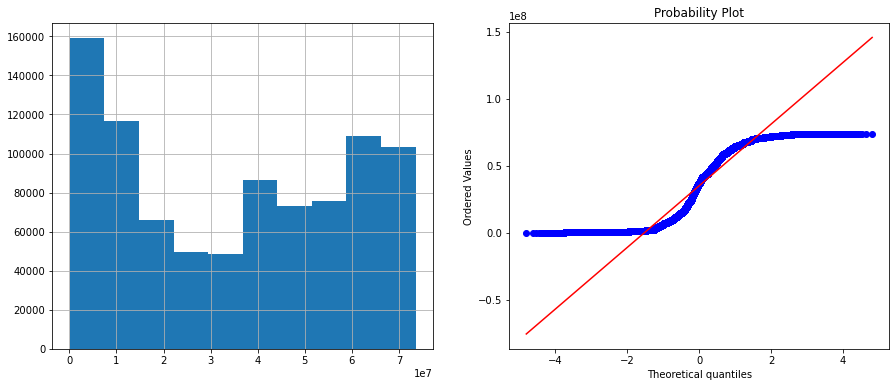

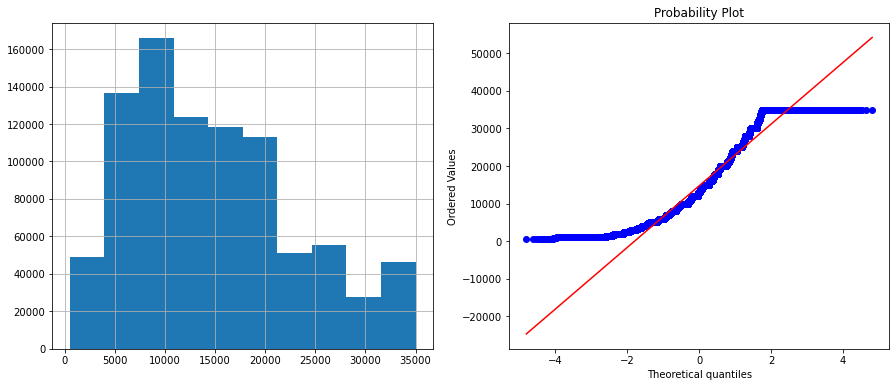

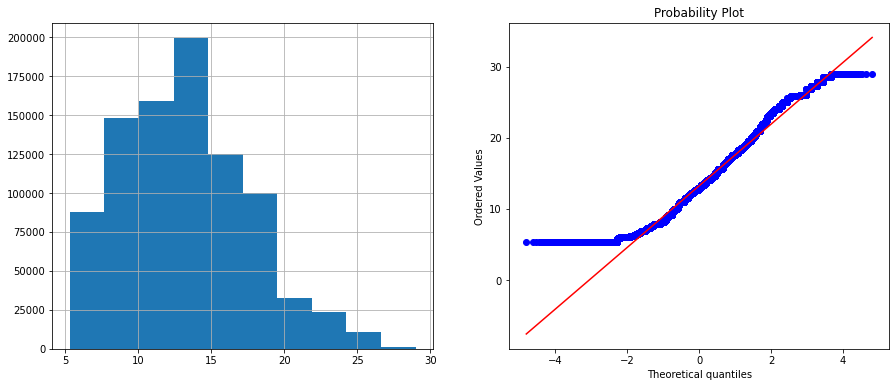

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


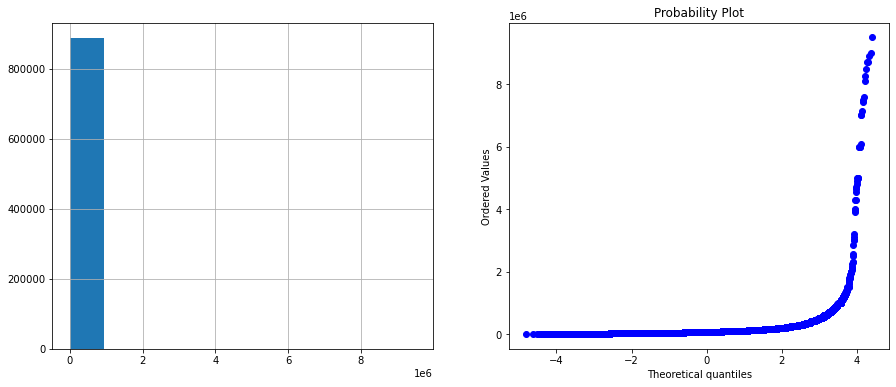

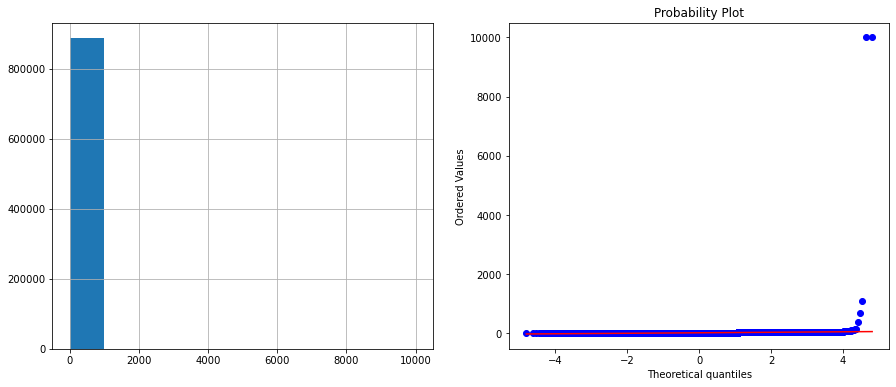

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


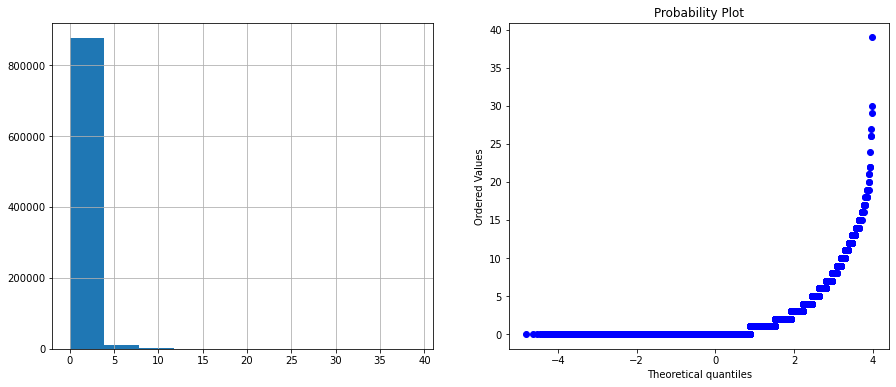

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


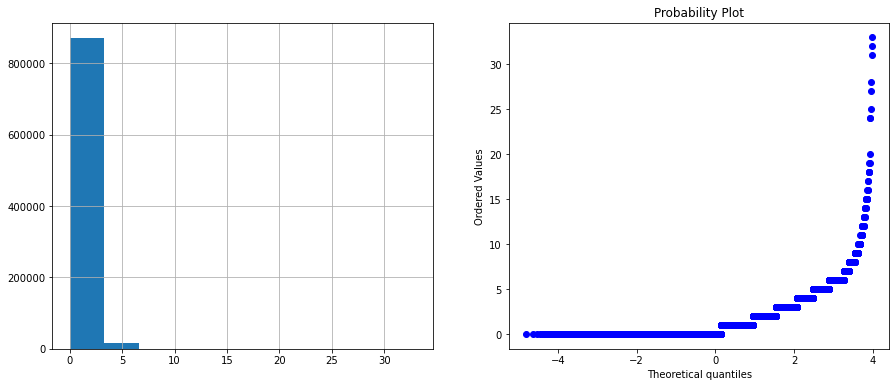

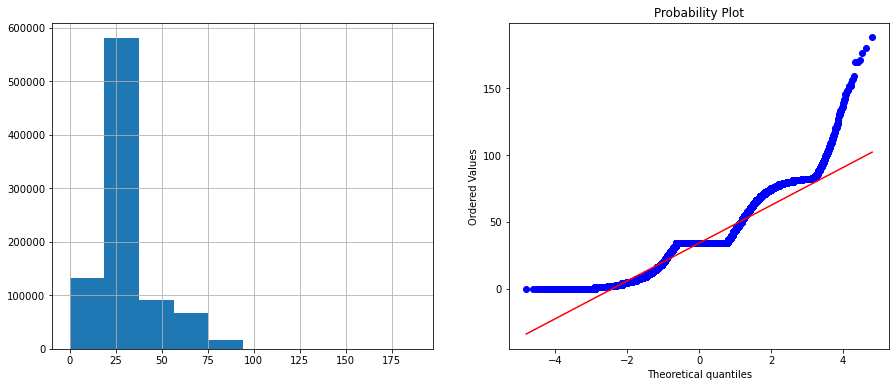

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


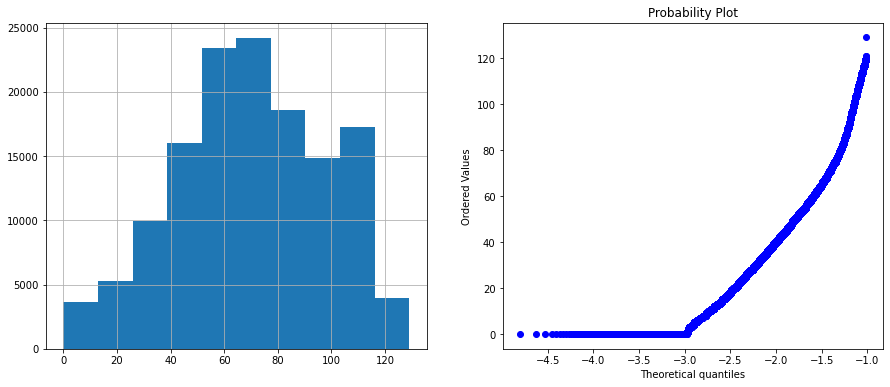

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


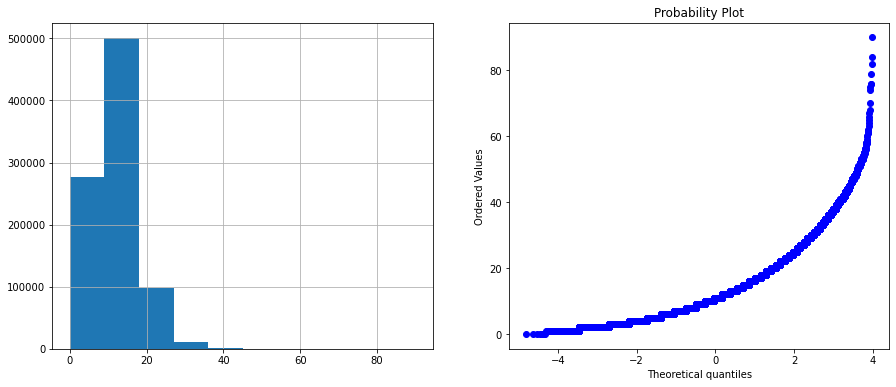

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


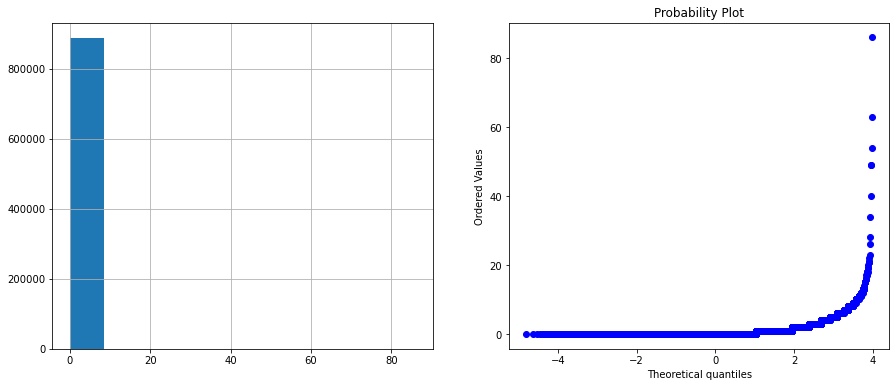

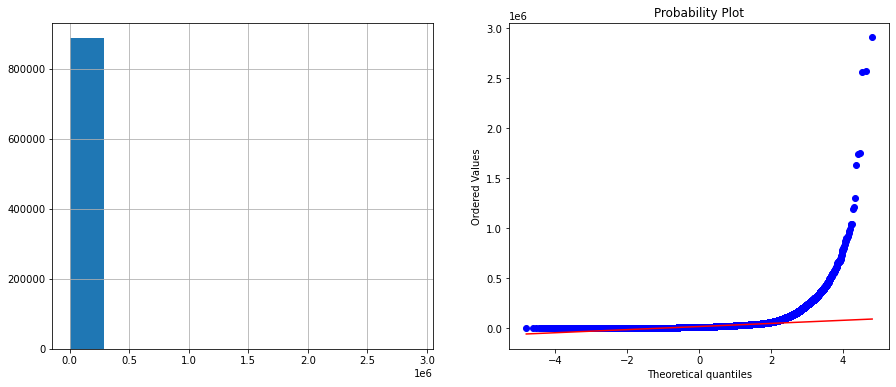

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


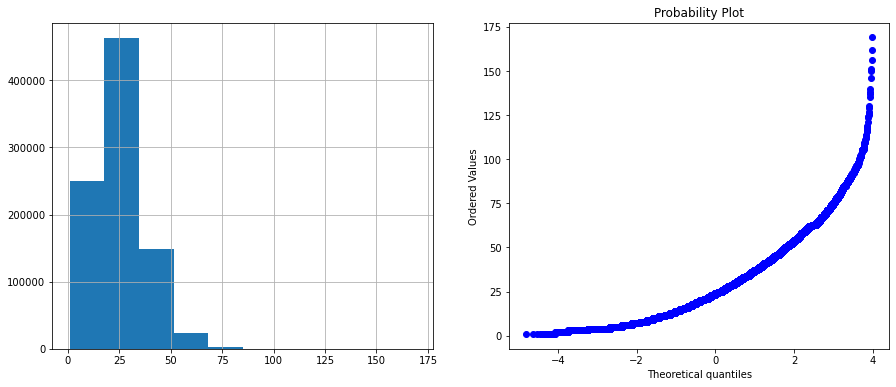

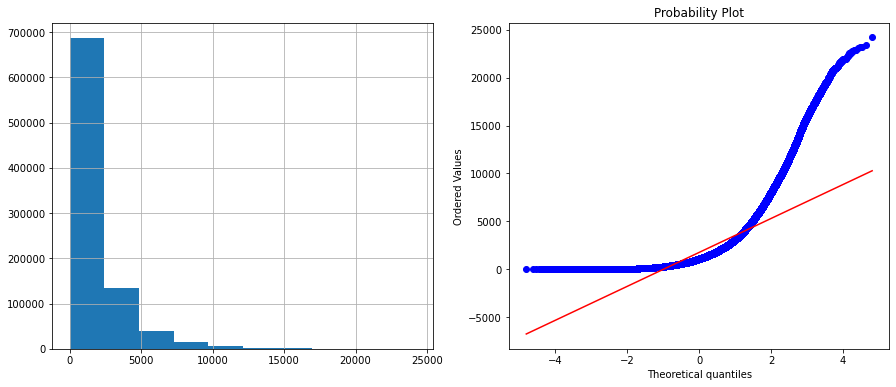

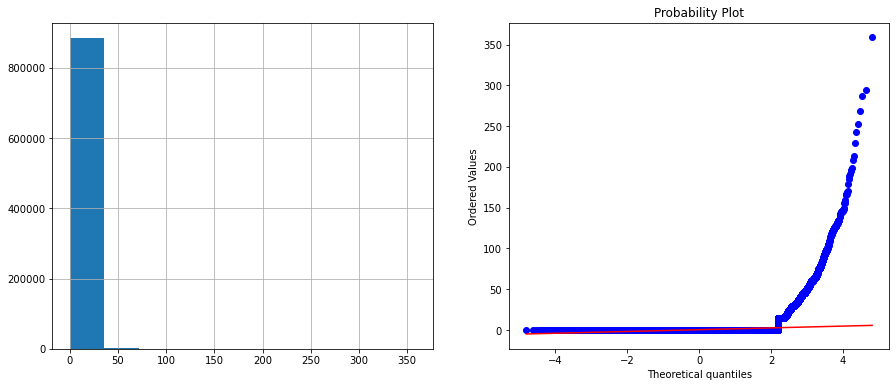

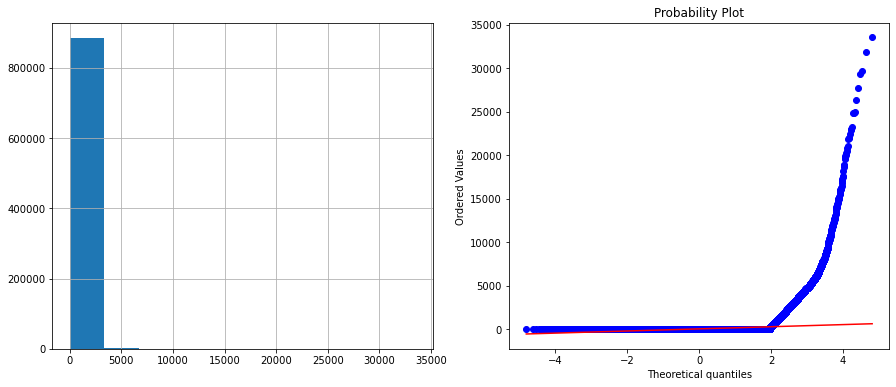

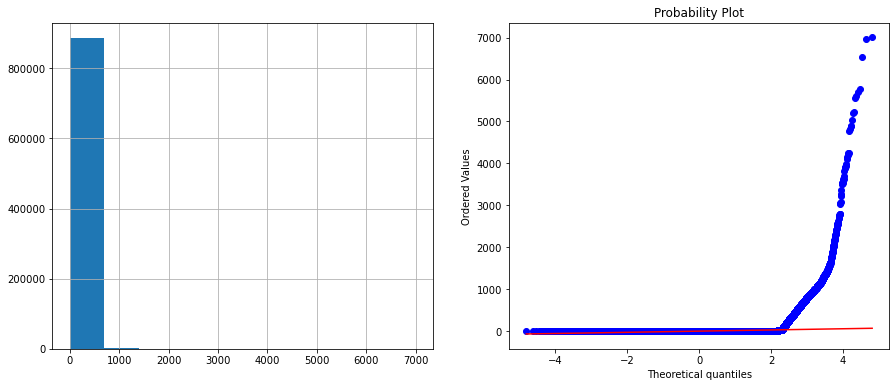

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


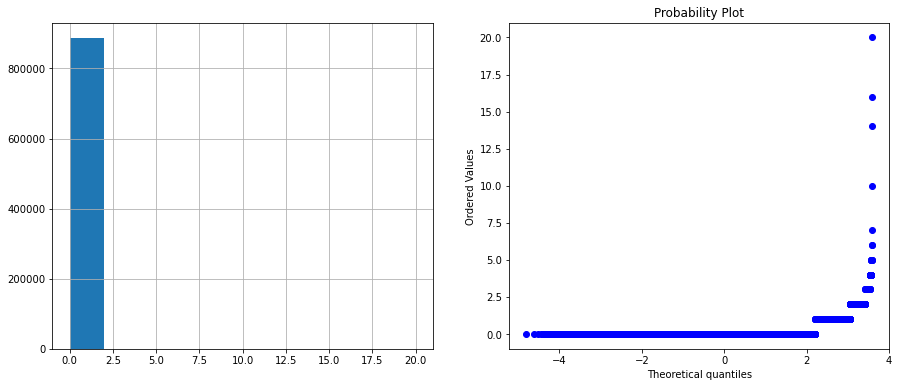

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


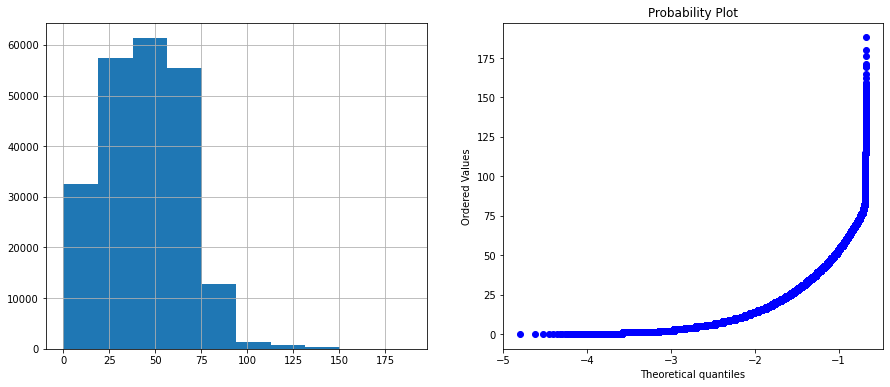

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


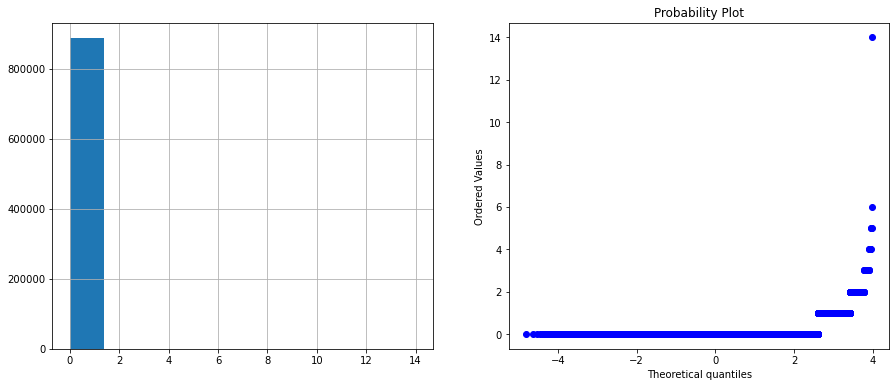

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


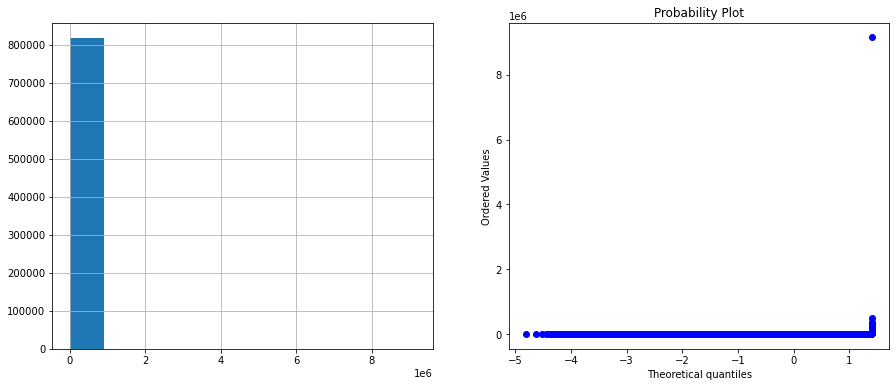

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


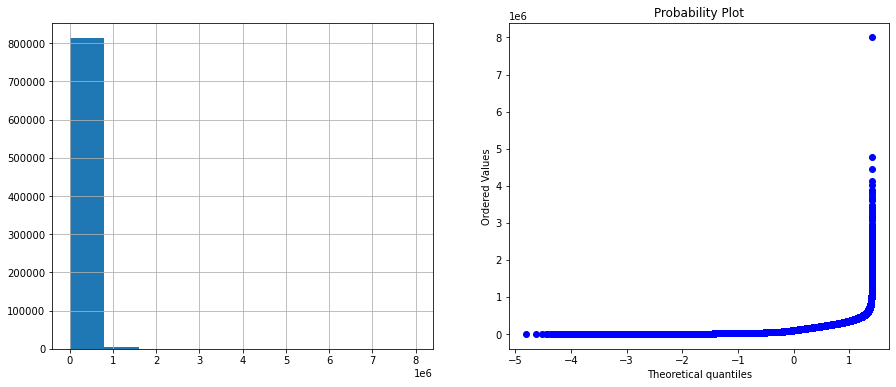

In [25]:
#here i m checking for the normality of numerical values before encoding i applied , non of the numerical variable is normaly distributed 
for i in numerical:
    diagnostic_plots(data, i)

### Data Analysis by applying different Imputations and Encoding formats

In [26]:
data1 = data.copy()
data1

,ï»¿member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,...,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,19145105,15000,36 months,BAT4217242,6.49,A,A2,Network administrator,1 year,MORTGAGE,...,0.0,0.0,0.0,77.0,INDIVIDUAL,NaN,83th week,0.0,0.0,143920.0
887375,46304777,35000,60 months,,25.89,G,G3,Credit Risk Analyst,1 year,OWN,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,772713.0
887376,903745,14000,60 months,BAT6117184,17.51,E,E4,USPS/Nashua L&DC,10+ years,OWN,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87th week,0.0,NaN,NaN
887377,53032475,20000,36 months,BAT3840785,7.26,A,A4,Computer Engineer,< 1 year,MORTGAGE,...,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,35th week,0.0,0.0,291998.0


In [27]:
# droping column 'verification_status_joint' since it is containing more than 75% of missing values
data1.drop(columns=['verification_status_joint','mths_since_last_major_derog','mths_since_last_record'],inplace=True,axis=1)

In [28]:
#  !pip install feature-engine

In [29]:
num_col=['collections_12_mths_ex_med','inq_last_6mths','acc_now_delinq','delinq_2yrs','total_credits','pub_rec','numb_credit','annual_inc']

### Median Imputation - Simplest form of Imputation 

In [30]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [31]:
# Median imputation 
imputer = mdi.MeanMedianImputer(imputation_method='median',
                                variables=num_col)

imputer.fit(data1)

MeanMedianImputer(variables=['collections_12_mths_ex_med', 'inq_last_6mths',
                             'acc_now_delinq', 'delinq_2yrs', 'total_credits',
                             'pub_rec', 'numb_credit', 'annual_inc'])

In [32]:
imputer.imputer_dict_

{'collections_12_mths_ex_med': 0.0,
 'inq_last_6mths': 0.0,
 'acc_now_delinq': 0.0,
 'delinq_2yrs': 0.0,
 'total_credits': 24.0,
 'pub_rec': 0.0,
 'numb_credit': 11.0,
 'annual_inc': 65000.0}

In [33]:
new_data1=imputer.transform(data1)

In [34]:
# display numerical variables

numerical1 = [col for col in new_data1.columns if new_data1[col].dtypes != 'O']

numerical1

['ï»¿member_id ',
 'loan_amnt ',
 'Rate_of_intrst',
 'annual_inc',
 'debt_income_ratio',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'numb_credit',
 'pub_rec',
 'total revol_bal',
 'total_credits',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_colle_amt',
 'tot_curr_bal']

In [35]:
# checking for missing values in numerical columns after median imputation

new_data1[numerical1].isna().mean().sort_values(ascending=False)

tot_curr_bal                  0.079195
tot_colle_amt                 0.079195
loan_amnt                     0.000000
Rate_of_intrst                0.000000
annual_inc                    0.000000
debt_income_ratio             0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.000000
numb_credit                   0.000000
pub_rec                       0.000000
total revol_bal               0.000000
total_credits                 0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
collections_12_mths_ex_med    0.000000
acc_now_delinq                0.000000
ï»¿member_id                  0.000000
dtype: float64

In [36]:
data_clust = new_data1.copy()
x=data_clust[['mths_since_last_delinq','tot_curr_bal','tot_colle_amt','Emp_designation','Experience']]
type(x)

pandas.core.frame.DataFrame

In [37]:
# droping column 'verification_status_joint' since it is containing more than 75% of missing values
data_clust.drop(columns=['mths_since_last_delinq','tot_curr_bal','tot_colle_amt','Emp_designation','Experience'],inplace=True,axis=1)

In [38]:
#Data looks clean and free of missing values
data_clust.isna().mean()

ï»¿member_id                  0.000000
loan_amnt                     0.000000
terms                         0.000000
batch_ID                      0.147342
Rate_of_intrst                0.000000
grade                         0.000000
sub_grade                     0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
purpose                       0.000000
State                         0.000000
debt_income_ratio             0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
numb_credit                   0.000000
pub_rec                       0.000000
total revol_bal               0.000000
total_credits                 0.000000
initial_list_status           0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
collections_12_mths_ex_med    0.000000
application_type         

### RareLabel Categorical Encoding
  - Rare labels are those categorical feature values that appear only in a small subset of observations.

In [39]:
# rarelabel encoding 
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

In [40]:
categorical = [col for col in data_clust.columns if data_clust[col].dtypes == 'O']

categorical

['terms',
 'batch_ID ',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'State',
 'initial_list_status',
 'application_type',
 'last_week_pay']

In [41]:
# Rare value encoder
rare_encoder = RareLabelCategoricalEncoder(
    tol=0.02,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['terms',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'State',
 'initial_list_status',
 'application_type',
 'last_week_pay'] # variables to re-group
)  

In [42]:
data_clust_rare = rare_encoder.fit_transform(data_clust)

C:\Users\harsh\anaconda3\lib\site-packages\feature_engine\categorical_encoders.py:785: UserWarning: The number of unique categories for variable terms is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "
C:\Users\harsh\anaconda3\lib\site-packages\feature_engine\categorical_encoders.py:785: UserWarning: The number of unique categories for variable verification_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "
C:\Users\harsh\anaconda3\lib\site-packages\feature_engine\categorical_encoders.py:785: UserWarning: The number of unique categories for variable initial_list_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique cat

In [43]:
rare_encoder.encoder_dict_

{'terms': array(['36 months', '60 months'], dtype=object),
 'grade': Index(['B', 'C', 'A', 'D', 'E', 'F'], dtype='object'),
 'sub_grade': Index(['B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'B5', 'B2', 'B1', 'A5', 'C5', 'D1',
        'A4', 'D2', 'D3', 'D4', 'A3', 'A1', 'A2', 'D5', 'E1'],
       dtype='object'),
 'home_ownership': Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object'),
 'verification_status': array(['Source Verified', 'Not Verified', 'Verified'], dtype=object),
 'purpose': Index(['debt_consolidation', 'credit_card', 'home_improvement', 'other'], dtype='object'),
 'State': Index(['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA', 'NC', 'MI',
        'MD', 'MA', 'AZ', 'WA', 'CO'],
       dtype='object'),
 'initial_list_status': array(['f', 'w'], dtype=object),
 'application_type': array(['INDIVIDUAL', 'JOINT'], dtype=object),
 'last_week_pay': Index(['13th week', '9th week', '26th week', '22th week', '4th week',
        '35th week', '39th week', '17th week', '31th week', '48t

In [44]:
for i in categorical:
  print(data_clust_rare[i].value_counts())

36 months    621125
60 months    266254
Name: terms, dtype: int64
              234087
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT2331079        13
BAT6671483        10
BAT3411179         9
BAT3966851         8
BAT6027836         7
Name: batch_ID , Length: 207, dtype: int64
B       254535
C       245860
A       148202
D       139542
E        70705
F        23046
Rare      5489
Name: grade, dtype: int64
Rare    80972
B3      56323
B4      55626
C1      53387
C2      52236
C3      50161
C4      48857
B5      48833
B2      48781
B1      44972
A5      44816
C5      41219
D1      36238
A4      34531
D2      29803
D3      26554
D4      25558
A3      23457
A1      22913
A2      22485
D5      21389
E1      18268
Name: sub_grade, dtype: int64
MORTGAGE    443557
RENT        356117
OWN          87470
Rare           235
Name: home_ownership, dtype: int64
Source Verified    329558
Verified           291071
Not Verified       266750
Na

In [45]:
data_clust_rare.shape

(887379, 28)

In [46]:
data_clust_rare_enc = pd.get_dummies(data_clust_rare,drop_first=True)
data_clust_rare_enc.shape

(887379, 296)

In [47]:
data_clust_rare_enc.head()

,ï»¿member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total revol_bal,...,last_week_pay_4th week,last_week_pay_52th week,last_week_pay_61th week,last_week_pay_65th week,last_week_pay_74th week,last_week_pay_78th week,last_week_pay_87th week,last_week_pay_91th week,last_week_pay_9th week,last_week_pay_Rare
0,58189336,14350,19.19,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,...,0,0,0,0,0,0,0,0,0,0
1,70011223,4800,10.99,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,...,0,0,0,0,0,0,0,0,1,0
2,70255675,10000,7.26,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,...,0,0,0,0,0,0,0,0,1,0
3,1893936,15000,19.72,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,...,0,0,0,0,0,0,0,0,0,1
4,7652106,16000,10.64,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# Normalization function 
def norm_func(i):
    x = (i-i.min()) /(i.max() - i.min())
    return (x)

In [49]:
df_norm = norm_func(data_clust_rare_enc)
df_norm.head(10)  # Top 10 rows

,ï»¿member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total revol_bal,...,last_week_pay_4th week,last_week_pay_52th week,last_week_pay_61th week,last_week_pay_65th week,last_week_pay_74th week,last_week_pay_78th week,last_week_pay_87th week,last_week_pay_91th week,last_week_pay_9th week,last_week_pay_Rare
0,0.791009,0.401449,0.585974,0.003021,0.003388,0.0,0.030303,0.155556,0.011628,0.007751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.951907,0.124638,0.239544,0.006842,0.000364,0.0,0.030303,0.066667,0.000000,0.002625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.955234,0.275362,0.081960,0.004737,0.001842,0.0,0.000000,0.055556,0.000000,0.003744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.024818,0.420290,0.608365,0.011053,0.001497,0.0,0.060606,0.111111,0.000000,0.004720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.103187,0.449275,0.224757,0.005474,0.002016,0.0,0.000000,0.122222,0.000000,0.012336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.138508,0.420290,0.151246,0.012632,0.001230,0.0,0.000000,0.200000,0.000000,0.006555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.109142,0.130435,0.108999,0.007895,0.000570,0.0,0.000000,0.144444,0.023256,0.004569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.312662,0.159420,0.162653,0.005684,0.001163,0.0,0.030303,0.144444,0.000000,0.001199,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.623761,0.159420,0.366286,0.009684,0.003085,0.0,0.000000,0.177778,0.000000,0.016375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.560767,0.986957,0.499366,0.007579,0.003392,0.0,0.000000,0.133333,0.000000,0.010341,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Principal Component Analysis
   - PCA used to make data easy to explore and visualize. Also, to explain the variance-covariance structure of a set of            variables through linear combinations

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()
pca_values = pca.fit_transform(df_norm)

In [52]:
# The amount of variance that each PCA explains is in sorted order
var = pca.explained_variance_ratio_
var

array([6.90462275e-02, 6.88753872e-02, 5.75763489e-02, 5.35369356e-02,
       4.79984839e-02, 4.51624325e-02, 3.58039893e-02, 3.32051753e-02,
       3.18258731e-02, 2.51981787e-02, 2.11011433e-02, 1.78235786e-02,
       1.71139152e-02, 1.44095770e-02, 1.41496543e-02, 1.35462968e-02,
       1.26588664e-02, 1.13728947e-02, 1.08683218e-02, 1.02539718e-02,
       1.01619806e-02, 1.00898194e-02, 9.88676896e-03, 9.62570737e-03,
       9.57103409e-03, 9.53680765e-03, 9.48468301e-03, 9.13240085e-03,
       8.92081608e-03, 8.72039175e-03, 8.42878688e-03, 8.30137509e-03,
       8.27317107e-03, 8.18283558e-03, 7.94865886e-03, 7.60389641e-03,
       7.59409756e-03, 7.05083544e-03, 6.85830901e-03, 6.72416898e-03,
       6.58500458e-03, 6.54596129e-03, 6.45163030e-03, 6.20382393e-03,
       6.08013046e-03, 5.91926530e-03, 5.68863733e-03, 5.50881908e-03,
       5.38990963e-03, 5.27773863e-03, 5.04383839e-03, 4.91241822e-03,
       4.77320328e-03, 4.58468101e-03, 4.46368068e-03, 4.43993790e-03,
      

In [53]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1


array([ 6.9 , 13.79, 19.55, 24.9 , 29.7 , 34.22, 37.8 , 41.12, 44.3 ,
       46.82, 48.93, 50.71, 52.42, 53.86, 55.27, 56.62, 57.89, 59.03,
       60.12, 61.15, 62.17, 63.18, 64.17, 65.13, 66.09, 67.04, 67.99,
       68.9 , 69.79, 70.66, 71.5 , 72.33, 73.16, 73.98, 74.77, 75.53,
       76.29, 77.  , 77.69, 78.36, 79.02, 79.67, 80.32, 80.94, 81.55,
       82.14, 82.71, 83.26, 83.8 , 84.33, 84.83, 85.32, 85.8 , 86.26,
       86.71, 87.15, 87.58, 88.  , 88.4 , 88.79, 89.17, 89.55, 89.92,
       90.26, 90.56, 90.83, 91.09, 91.33, 91.56, 91.78, 92.  , 92.22,
       92.43, 92.63, 92.82, 93.  , 93.18, 93.35, 93.52, 93.68, 93.83,
       93.97, 94.11, 94.25, 94.38, 94.51, 94.64, 94.76, 94.88, 95.  ,
       95.12, 95.24, 95.35, 95.46, 95.57, 95.68, 95.79, 95.9 , 96.01,
       96.12, 96.22, 96.32, 96.42, 96.52, 96.61, 96.7 , 96.79, 96.88,
       96.96, 97.04, 97.12, 97.2 , 97.28, 97.35, 97.42, 97.49, 97.56,
       97.63, 97.7 , 97.77, 97.83, 97.89, 97.95, 98.01, 98.07, 98.13,
       98.19, 98.24,

In [54]:
new_df = pd.DataFrame(pca_values[:,0:56])  #here we r creating data frame consisting of top three pca having highest variance
new_df.shape

(887379, 56)

### K-Means Clustering
 - K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster
 - K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [55]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [ ]:
# ###### scree plot or elbow curve ############
# k = list(range(2,10))
# # variable for storing total within sum of squares for each kmeans 
# TWSS = [] 
# for i in k:
#     kmeans = KMeans(n_clusters = i)
#     kmeans.fit(new_df)
#     # variable for storing within sum of squares for each cluster 
#     WSS = [] 
#     for j in range(i):
#         WSS.append(sum(cdist(new_df.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,new_df.shape[1]),"euclidean")))
#     TWSS.append(sum(WSS))
# # Scree plot 
# plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
# plt.show()

In [57]:
# Selecting 9 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=9) 
model1.fit(new_df)

model1.labels_ # getting the labels of clusters assigned to each row 

array([3, 5, 6, ..., 3, 0, 4])

In [58]:
new_df['Clust_no']=model1.labels_ # creating a  new column and assigning it to new column 

In [59]:
final_data = pd.concat([new_df, x], axis=1, sort=False)

In [60]:
final_data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,Clust_no,mths_since_last_delinq,tot_curr_bal,tot_colle_amt,Emp_designation,Experience
0,-0.505788,-0.260573,-0.511430,-0.051153,0.654535,-0.088000,0.274516,-0.623671,-0.770680,1.081156,...,0.007600,-0.017532,-0.007205,-0.000343,3,50.000000,28699.0,0.0,clerk,9 years
1,-0.706813,1.115192,-0.188998,-0.501591,-0.050409,-0.258671,-0.134608,-0.352997,-0.006711,0.079320,...,-0.063744,0.196719,-0.065418,-0.059127,5,34.063798,9974.0,0.0,Human Resources Specialist,< 1 year
2,-0.554280,-0.033543,-0.170791,-0.565153,-0.456710,-0.409368,0.306386,-0.555055,0.404127,0.584874,...,-0.103375,-0.089886,-0.103545,-0.047431,6,34.063798,38295.0,65.0,Driver,2 years
3,0.786108,-0.407065,-0.621405,0.578394,0.301274,0.573777,0.435595,-0.029566,0.662852,-0.136497,...,-0.045586,-0.200089,-0.075910,-0.045571,8,46.000000,55564.0,0.0,Us office of Personnel Management,10+ years
4,1.008113,0.906196,0.408162,-0.176537,-0.507946,0.672173,-0.864953,0.246941,0.484243,-0.120040,...,-0.027704,-0.008724,-0.019113,-0.021733,0,34.063798,47159.0,0.0,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years


In [61]:
final_data['Emp_designation_new']=(final_data.groupby(['Clust_no'])['Emp_designation'].apply(lambda x: x.fillna(x.mode()[0])))

In [62]:
final_data['Experience_new']=(final_data.groupby(['Clust_no'])['Experience'].apply(lambda x: x.fillna(x.mode()[0])))

In [63]:

med=final_data.groupby('Clust_no')['mths_since_last_delinq'].transform('median')
final_data['mths_since_last_delinq_new']=final_data['mths_since_last_delinq'].fillna(med)


In [64]:

med=final_data.groupby('Clust_no')['tot_curr_bal'].transform('median')
final_data['tot_curr_bal_new']=final_data['tot_curr_bal'].fillna(med)


In [65]:
med=final_data.groupby('Clust_no')['tot_colle_amt'].transform('median')
final_data['tot_colle_amt_new']=final_data['tot_colle_amt'].fillna(med)

In [66]:
final_data

,0,1,2,3,4,5,6,7,8,9,...,mths_since_last_delinq,tot_curr_bal,tot_colle_amt,Emp_designation,Experience,Emp_designation_new,Experience_new,mths_since_last_delinq_new,tot_curr_bal_new,tot_colle_amt_new
0,-0.505788,-0.260573,-0.511430,-0.051153,0.654535,-0.088000,0.274516,-0.623671,-0.770680,1.081156,...,50.000000,28699.0,0.0,clerk,9 years,clerk,9 years,50.000000,28699.0,0.0
1,-0.706813,1.115192,-0.188998,-0.501591,-0.050409,-0.258671,-0.134608,-0.352997,-0.006711,0.079320,...,34.063798,9974.0,0.0,Human Resources Specialist,< 1 year,Human Resources Specialist,< 1 year,34.063798,9974.0,0.0
2,-0.554280,-0.033543,-0.170791,-0.565153,-0.456710,-0.409368,0.306386,-0.555055,0.404127,0.584874,...,34.063798,38295.0,65.0,Driver,2 years,Driver,2 years,34.063798,38295.0,65.0
3,0.786108,-0.407065,-0.621405,0.578394,0.301274,0.573777,0.435595,-0.029566,0.662852,-0.136497,...,46.000000,55564.0,0.0,Us office of Personnel Management,10+ years,Us office of Personnel Management,10+ years,46.000000,55564.0,0.0
4,1.008113,0.906196,0.408162,-0.176537,-0.507946,0.672173,-0.864953,0.246941,0.484243,-0.120040,...,34.063798,47159.0,0.0,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,34.063798,47159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,0.305842,0.709679,0.734217,0.001915,0.224860,-0.209854,-0.300099,-0.250813,0.863744,0.485697,...,77.000000,143920.0,0.0,Network administrator,1 year,Network administrator,1 year,77.000000,143920.0,0.0
887375,0.207360,-1.112811,0.161401,-0.800028,0.437964,0.180698,-0.109830,-0.481213,-0.838090,0.187400,...,19.000000,772713.0,0.0,Credit Risk Analyst,1 year,Credit Risk Analyst,1 year,19.000000,772713.0,0.0
887376,0.467055,-0.646244,0.799491,-0.779626,0.932640,-0.062534,0.281517,0.334020,-0.974605,0.774451,...,54.000000,NaN,NaN,USPS/Nashua L&DC,10+ years,USPS/Nashua L&DC,10+ years,54.000000,71852.0,0.0
887377,-0.787296,0.929093,0.591689,-0.030875,0.215929,-0.029112,0.108350,-0.362874,0.252186,0.345354,...,34.063798,291998.0,0.0,Computer Engineer,< 1 year,Computer Engineer,< 1 year,34.063798,291998.0,0.0


In [67]:
X = final_data[['Emp_designation_new','Experience_new','mths_since_last_delinq_new','tot_curr_bal_new','tot_colle_amt_new']]

data_final=pd.concat([data_clust, X], axis=1, sort=False)

data_final.rename(columns={'Emp_designation_new':'Emp_designation','Experience_new':'Experience','mths_since_last_delinq_new':
                           'mths_since_last_delinq','tot_curr_bal_new':'tot_curr_bal','tot_colle_amt_new':'tot_colle_amt'},
                  inplace=True)

In [68]:
data_final.isna().mean()

ï»¿member_id                  0.000000
loan_amnt                     0.000000
terms                         0.000000
batch_ID                      0.147342
Rate_of_intrst                0.000000
grade                         0.000000
sub_grade                     0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
purpose                       0.000000
State                         0.000000
debt_income_ratio             0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
numb_credit                   0.000000
pub_rec                       0.000000
total revol_bal               0.000000
total_credits                 0.000000
initial_list_status           0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
collections_12_mths_ex_med    0.000000
application_type         

In [72]:
data_final.columns

Index(['ï»¿member_id ', 'loan_amnt ', 'terms', 'batch_ID ', 'Rate_of_intrst',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'State', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq',
       'Emp_designation', 'Experience', 'mths_since_last_delinq',
       'tot_curr_bal', 'tot_colle_amt'],
      dtype='object')

In [75]:
data_final.columns

Index(['loan_amnt ', 'terms', 'Rate_of_intrst', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'State', 'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'numb_credit', 'pub_rec', 'total revol_bal', 'total_credits',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq',
       'Emp_designation', 'Experience', 'mths_since_last_delinq',
       'tot_curr_bal', 'tot_colle_amt'],
      dtype='object')

In [76]:
data_final.to_csv(r'data_no_null.csv')

### End of Data Analysis and Imputation
  - Constructed a new dataset WITHOUT Null/Missing values and RELEVANT dependent variables. 
  - Analysed various types of Imputation and Encoding Methods.

Further, this new data and the raw data will be visulaized to understand how and what value specific variables add to the data.
Eventually, a model will be built and deployed to predict the revolving balance.